In [244]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
sns.set_context("talk")
plt.style.use('dark_background')

In [245]:
df_wine = pd.read_csv('./wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ashs',
                  'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
                  'Proanthcyanins', 'Color itensity', 'Hue', 'OD280/OD315 of diluted wines',
                  'Proline']
X = df_wine.loc[: , df_wine.columns != 'Class label']
y = df_wine.loc[:,'Class label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

### 固有値と固有ベクトルを計算

In [246]:
cov_mat = np.cov(X_train_std.T)

In [247]:
eigen_val, eigen_vec = np.linalg.eig(cov_mat)
eigen_val

array([4.84274532, 2.41602459, 1.54845825, 0.96120438, 0.84166161,
       0.6620634 , 0.51828472, 0.34650377, 0.3131368 , 0.10754642,
       0.21357215, 0.15362835, 0.1808613 ])

### 全分散と説明分散→各固有値の大きさの比率

In [248]:
total = np.sum(eigen_val)
var_exp = [i / total for i in sorted(eigen_val, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

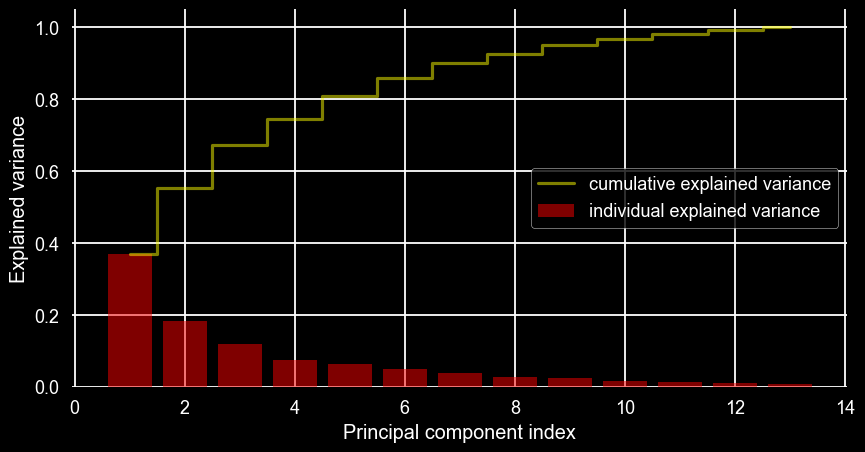

In [249]:
fig = plt.figure(figsize=(10,5),dpi=100)
plt.bar(range(1,14), var_exp, alpha=0.5, color='red', align = 'center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, alpha=0.5, color='yellow', where='mid', label = 'cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component index')
plt.legend(loc='best', frameon=True, edgecolor="white")
plt.legend?

### 固有値の大きい順に固有ベクトルを並べ替え、射影行列を作成

In [250]:
eigen_pair = [(np.abs(eigen_val[i]), eigen_vec[:,i]) for i in range(len(eigen_val))]
eigen_pair.sort(key=lambda k: k[0], reverse=True)

In [251]:
vec1 = eigen_pair[0][1]
vec2 = eigen_pair[1][1]
vec1 = vec1[:,np.newaxis] # vectorを13 x 1の行列に変換
vec2 = vec2[:,np.newaxis] # vectorを13 x 1の行列に変換
w = np.hstack((vec1,vec2))

In [252]:
#上を１行で書くと下記
w = np.hstack((eigen_pair[0][1][:,np.newaxis], eigen_pair[1][1][:,np.newaxis]))

### 変換行列w を用いてデータセット全体を射影

In [253]:
X_train_pca = X_train_std.dot(w)

In [254]:
print(X_train.shape)
print(X_train_pca.shape)

(124, 13)
(124, 2)


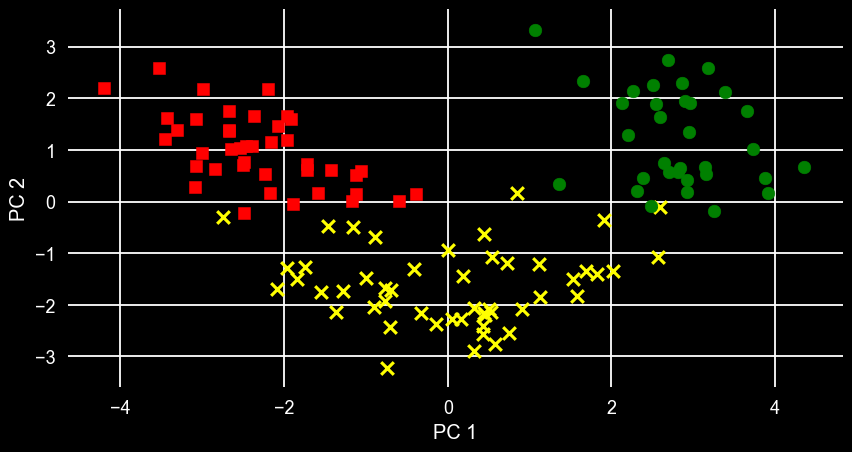

In [255]:
fig = plt.figure(figsize=(10,5),dpi=100)
colors = ['red', 'yellow', 'green']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l,marker = m)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')

In [256]:
df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
df['Class'] = pd.DataFrame(np.array(y_train),index=None)

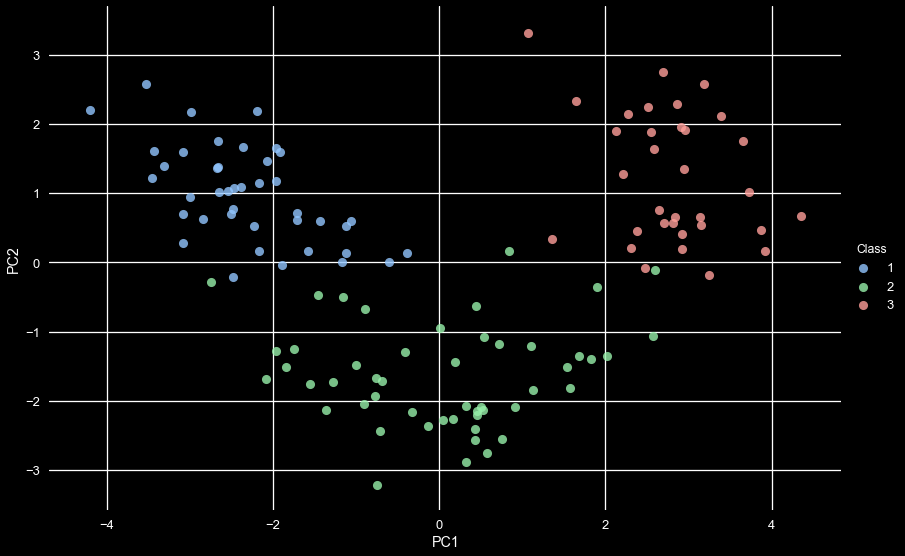

In [257]:
sns.lmplot(x='PC1', y='PC2', data=df, hue='Class', palette='pastel', fit_reg=False, 
           size=8, aspect=1.5)

In [258]:
X_test_pca = X_test_std.dot(w)

In [259]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C=1.0, random_state=1)
svm.fit(X_train_pca, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

<Figure size 432x288 with 0 Axes>

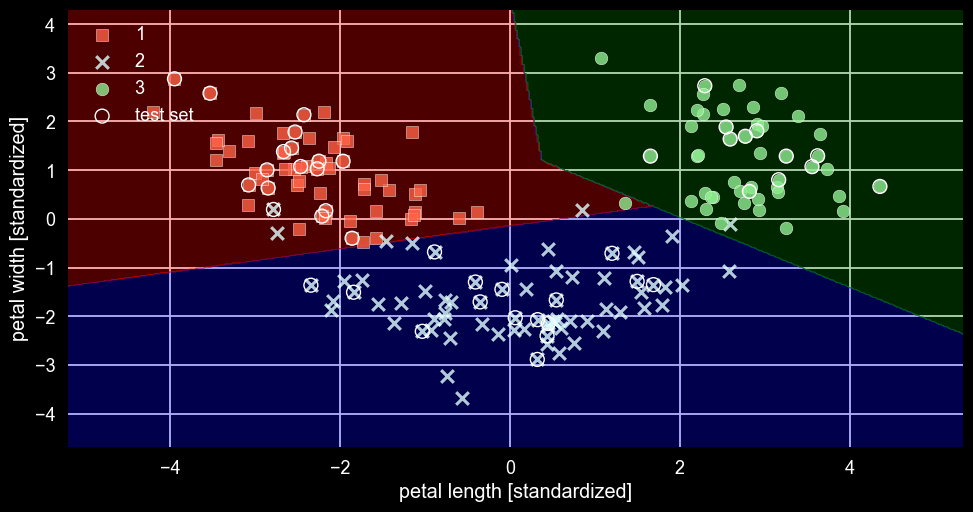

In [260]:
X_combined_std = np.vstack((X_train_pca, X_test_pca))
y_combined = np.hstack((y_train, y_test))

%run myGraph.py
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

In [261]:
svm.score(X_test_pca, y_test)

0.9814814814814815

### scikit-learnによるPCA

In [262]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [263]:
X_train_pca2 = pca.fit_transform(X_train_std)
X_test_pca2 = pca.transform(X_test_std)

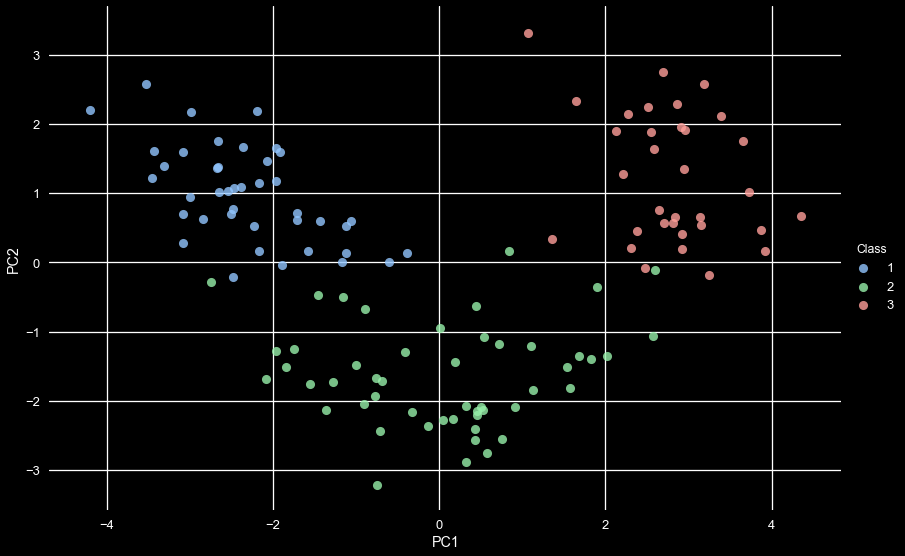

In [264]:
df2 = pd.DataFrame(X_train_pca2, columns=['PC1', 'PC2'])
df2['Class'] = pd.DataFrame(np.array(y_train),index=None)
sns.lmplot(x='PC1', y='PC2', data=df2, hue='Class', palette='pastel', fit_reg=False, 
           size=8, aspect=1.5)

In [265]:
svm2 = SVC(kernel = 'linear', C=1.0, random_state=1)
svm2.fit(X_train_pca2, y_train)
X_combined_std = np.vstack((X_train_pca2, X_test_pca2))
y_combined = np.hstack((y_train, y_test))

<Figure size 432x288 with 0 Axes>

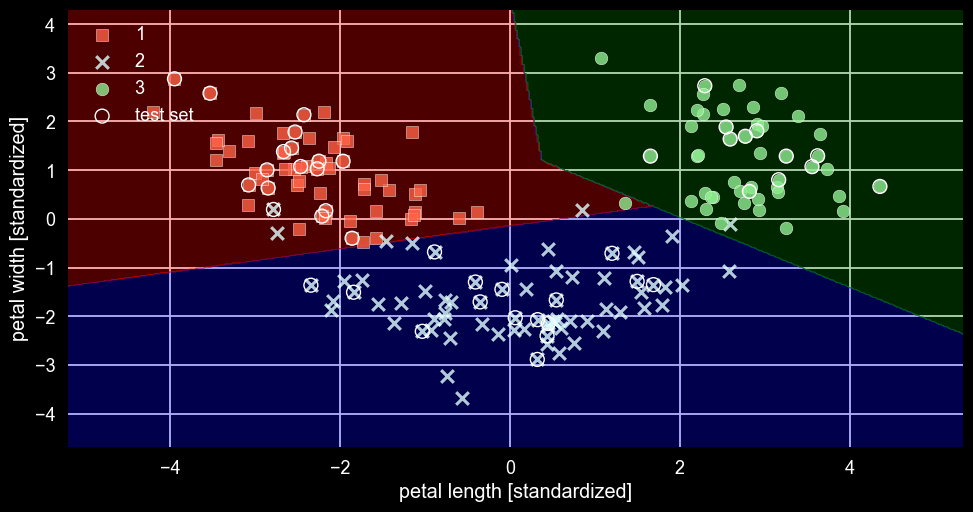

In [266]:
%run myGraph.py
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=svm2, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

In [267]:
print(svm.score(X_test_pca, y_test))
print(svm2.score(X_test_pca2, y_test))

0.9814814814814815
0.9814814814814815


In [272]:
pca_full = PCA(n_components=None)
X_train_pca2_full = pca_full.fit_transform(X_train_std)

In [274]:
pca_full.explained_variance_

array([4.84274532, 2.41602459, 1.54845825, 0.96120438, 0.84166161,
       0.6620634 , 0.51828472, 0.34650377, 0.3131368 , 0.21357215,
       0.1808613 , 0.15362835, 0.10754642])